# Image Recognition

Pada praktikum ini algoritma yang Anda bangun akan dilatih untuk melakukan pengenalan obyek pada sebuah gambar. Pada praktikum ini Anda akan menggunakan library tensorflow. 

Dalam melakukan proses pengenalan image, Anda memerlukan fitur-fitur yang telah anda pelajari pada notebook sebelumnya seperti histogram, pengenalan edge, dan sebagainya 

Adapun langkah langkah yang akan Anda lakukan untuk
1. Import library yang dibutuhkan 
2. Melakukan proses training terhadap dataset yang Anda
3. Mengevaluasi hasil prediksi 

Silahkan jalankan program di bawah ini. 

In [1]:
import cupy as cp
import time
import numpy as np

cp.cuda.Device(0).use()
for i in range (0,1):
    N = 1024
    
    start = time.time()
    A = cp.random.randint(-5,5,(N,N))
    B = cp.random.randint(-5,5,(N,N))
    #menggunakan GPU
    C = cp.matmul(A,B)
    cp.cuda.Stream.null.synchronize()
    print("Waktu yang diperlukan utk mengalikan 2 matirk berukuran %d,%d proses ke %d dengan GPU = %.2f"%(N,N,i,time.time()-start))
    
    start = time.time()
    A1 = cp.asnumpy(A)
    B1 = cp.asnumpy(B)
    #menggunakan CPU
    C = np.matmul(A1,B1)
    print("Waktu yang diperlukan utk mengalikan matirk berukuran %d,%d proses ke %d dengan CPU = %.2f"%(N,N,i,time.time()-start))
   

Waktu yang diperlukan utk mengalikan 2 matirk berukuran 1024,1024 proses ke 0 dengan GPU = 0.92
Waktu yang diperlukan utk mengalikan matirk berukuran 1024,1024 proses ke 0 dengan CPU = 6.65


In [2]:
import tensorflow as tf
import time

N = 1024
A = np.random.randint(-5,5,(N,N))
B = np.random.randint(-5,5,(N,N))

start = time.time()

with tf.compat.v1.device('/device:CPU:0'):
     C = tf.matmul(A,B)
print("Waktu matmul dengan Tensorflow = %.2f"%(time.time()-start))

Waktu matmul dengan Tensorflow = 0.02


In [3]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# load dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)
# membagi kedalam kolom input dan output
X, y = df.values[:, :-1], df.values[:, -1]
# set tipe data menjadi float
X = X.astype('float32')
# membuat encode label
y = LabelEncoder().fit_transform(y)
# membagi kedalam dataset train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]

# membuat model Neural Network dengan 3 layer

model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluasi  model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Akurasi Data Tes: %.3f' % acc)

# make a prediction
row = np.random.random_sample((1,34))  
row = np.array(row)
yhat = model.predict(row)
print('Hasil Prediksi: %.3f' % yhat)


(235, 34) (116, 34) (235,) (116,)
Akurasi Data Tes: 0.905
Hasil Prediksi: 0.744


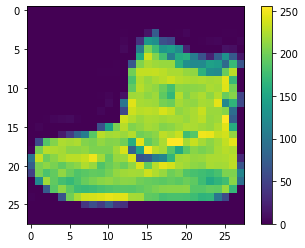

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()



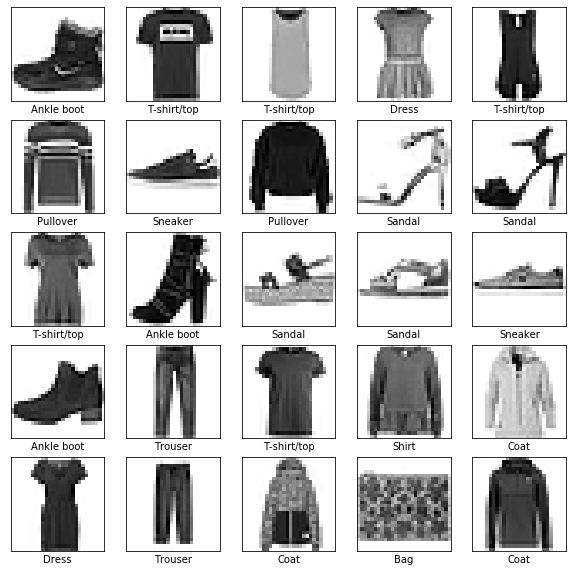

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4963 - acc: 0.8268
Epoch 2/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3782 - acc: 0.8637
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3386 - acc: 0.8756
Epoch 4/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3158 - acc: 0.8832
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2969 - acc: 0.8898
Epoch 6/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2815 - acc: 0.8951
Epoch 7/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2706 - acc: 0.8998
Epoch 8/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2590 - acc: 0.9039
Epoch 9/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2490 - acc: 0.9069
Epoch 10/10
60000/60000 [==============================] - 

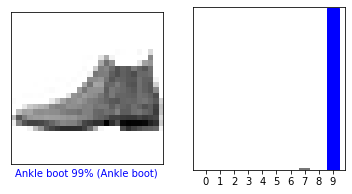

In [6]:
#Membangun model NN
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Melatih Model
model.fit(train_images, train_labels, epochs=10)

#Menguji model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

np.argmax(predictions[0])

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### Menampilkan Salah Satu Hasil Prediksi Yang salah

Dalam hal ini gambar tersebut dikategorikan sebagai sandal (kode kelas 5), yang seharusnya adalah kelas sneaker (kode kelas 7) 

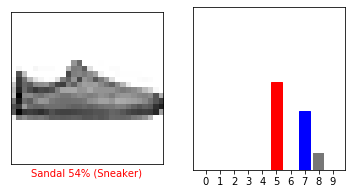

In [7]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### Menampilkan Hasil Prediksi Keseluruhan Dari Algoritma yang Dibangun 

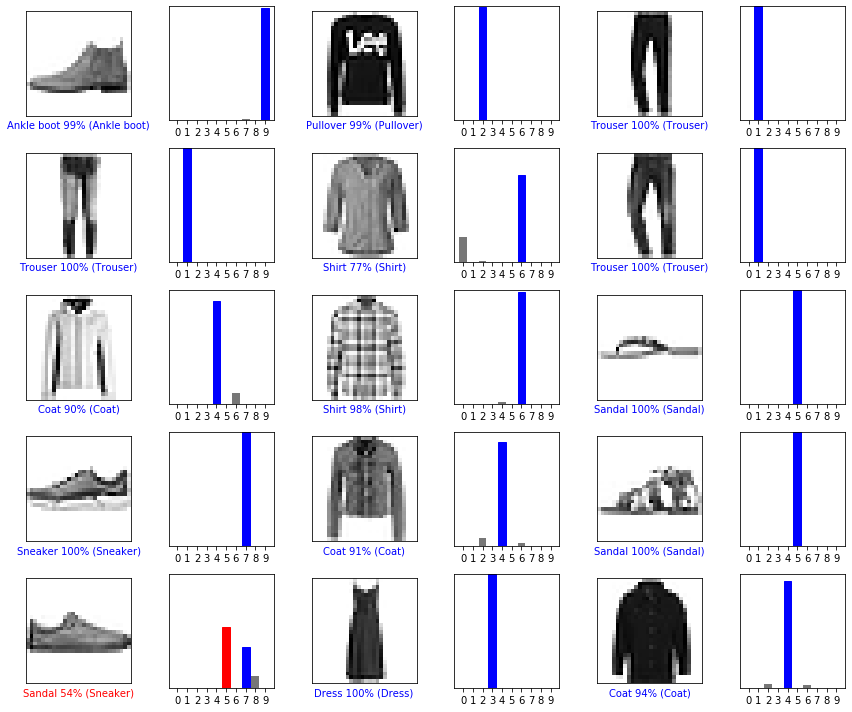

In [8]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()